# Introduction to Scikit-Learn
### Michael Joyce, Ph.D.



**_Note to participants:_** please restart your kernel. Choose "Kernel" in the toolbar above and then choose "Restart & Clear Output."

# Scikit-learn

Scikit-learn is a python library that helps users achieve in seconds what mathematicians and statisticians could only dream of a couple of generations ago. Like Numpy and Scipy, it adds functionality to Python programming and saves users from having to constantly re-invent the wheel in coding, but it also does so much more!

Additionally, the machine learning algorithms in scikit-learn are some of the best examples of object oriented programming (OOP). More on this later.

>**_An Official Definition:_** Scikit-learn is a Python module integrating a wide range of state-of-the-art machine learning algorithms for medium-scale supervised and unsupervised problems. This package focuses on bringing machine learning to non-specialists using a general-purpose high-level language. Emphasis is put on ease of use, performance, documentation, and API consistency. It has minimal dependencies and is distributed under the simplified BSD license, encouraging its use in both academic and commercial settings. Source code, binaries, and documentation can be downloaded from http://sci-kit-learn.sourceforge.net. -- Journal of Machine Learning Research

## Important notes:

### 1. Please feel free to interrupt and ask questions. If you don't understand something, you're very likely not alone! I would appreciate your help in making this lesson as clear as possible.

### 2. There will be 10 minutes of question time after the talk. Please also contact me at michaeljoyce217@gmail.com with any further questions that you might have.

### 3. This presentation is going to cover a lot of material and will go fairly quickly. This notebook is posted at ----------- for further review. It might be a good idea during the talk to focus less on the code and more on the general ideas being presented. 

### 4 I believe people generally learn best by "doing" so there is a homework assignment at the end of the notebook in which you will replicate the lecture on a different dataset.

### 5. I will likely ask you a direct question. It is not important that you get this right, just that you think about it and do your best!

## Agenda

#### 1. Brief review of logistic regression

#### 2. Overfitting and underfitting

#### 3. How to prepare data to use the scikit-learn library

#### 4. Train-test-split

#### 5. Fitting a logistic regression model with scikit-learn 

#### 6. Scoring and validating the model

In [1]:
# import several needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Logistic Regression

In Section 3 of this notebook, we will be trying to predict whether a group at a restaurant tips more than $15\%$, given a set of features of the group. This is a binary classification problem, as the only possibilities are "yes" or "no." As logistic regression is a binary classifier with a high degree of interpretability, it is a good algorithm with which to build a model. We will let $1$ indicate that the party did tip more than $15\%$, and let $0$ indicate that they did not.

Recall that the output of the Logistic Function is a probability $p$ that a given data point belongs in class $1$. The Logistic function takes in a data point $(x_{1},\dots, x_{n})$ and returns a probability $p$.

$$p=\frac{1}{1+e^{-\left(\beta_{0}+\beta_{1}x_{1}+\cdots +\beta_{n}x_{n})\right)}}$$

We add a decision function to turn the Logistic Function into a classifier. The standard decision function is to decide that if the ouput of the logistic function is greater than or equal to $0.5$ for a particular data point, the data point is likely to be in class $1$, so we assign it to class $1$. Similarly, if the ouput of the logistic function is less than $0.5$ for a particular data point, we assign it to class $0$.


### This optimization of the logistic regression model by the best choice of the coefficients $\beta_{0},\beta_{1},\dots, \beta_{n}$, using maximum likelihood estimation (MLE), is what we call "fitting the model."

#### The following graphs are illustrative. Suppose that the true data is as shown.

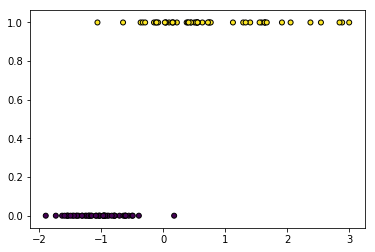

In [2]:
# make some data to look at
from sklearn.datasets import make_classification
from math import exp

X = np.linspace(-2, 2, 100)
y = [1/(1+exp(-x)) for x in X]

X0, y0 = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=96)
plt.scatter(X0, y0, marker='o', c=y0, s=25, edgecolor='k')


A typical result of logistic regression is shown in the following graph.

/Users/michaeljoyce/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


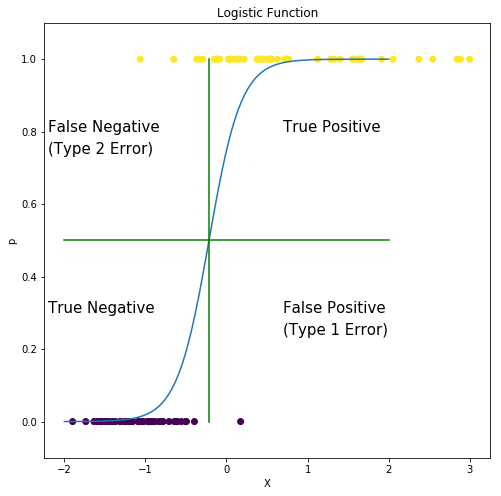

In [3]:
# show the usual logistic regression graphic
def sigmoid(x, b0, b1):
    return 1/(1+np.exp(-(b0+x*b1)))

b0 = 1.09
b1 = 5.05

ideal = [sigmoid(u, b0, b1) for u in X]
desc = [.5 for u in X]


fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(X0, y0, c=y0)
ax.plot(X, ideal)
ax.plot(X, desc, color='g')
ax.plot([-0.22, -0.22], [0,1], color='g')
ax.set_title("Logistic Function")
ax.set_xlabel("X")
ax.set_ylabel("p")
ax.set_ylim([-.1, 1.1])
ax.text(-2.2, 0.8, r'False Negative', fontsize=15)
ax.text(-2.2, 0.74, r'(Type 2 Error)', fontsize=15)
ax.text(0.7, 0.8, r'True Positive', fontsize=15)
ax.text(-2.2, 0.3, r'True Negative', fontsize=15)
ax.text(0.7, 0.3, r'False Positive', fontsize=15)
ax.text(0.7, 0.24, r'(Type 1 Error)', fontsize=15)

fig.show()

#### That was a lot of math! How much of this do you need to know to use scikit-learn? ... Not that much really, but its nice to have some background.

## Facts to remember - Logistic Regression:

-takes data points as input and returns a $0$ or a $1$, indicating which class that data point is predicted to belong in.

-can handle discrete numeric variables, but not categorical variables, as math functions require numbers!

-chooses optimal values for the coefficients $\beta_{0},\beta_{1},\dots, \beta_{n}$ using maximum likelihood estimation (MLE). Note that ordinary least squares (OLS) is used to choose the coefficients in linear regression. In both cases, this is called "fitting (or training) the model."




# 2. Overfitting and underfitting

<img src="img/Overfitting_Underfitting.png" alt="Drawing" style="width: 800px;"/>


**_Overfitting_** is when your model is excellent at predicting the data you used to train it. This is often a consequence of model complexity. The problem is that new data is unlikely to be accurately predicted by that model. So, the error on training data will likely be smaller and the error on new data will likely be greater.

**_Underfitting_** is when your model is too simple to predict much of anything. Again, the error will on training data, and on new data, will likely be substantial.

**_A model that is optimally fit_** will be a model that is as simple as possible but still performs well on training data and also performs well on new data. Ideally, error will be minimized.

We will see that **_scikit-learn_** allows you to easily create a model that is **_optimally fit_**.

# 3. Preparing data for utilization in scikit-learn

The dataset that will be used today is the  [tipping dataset.](https://drive.google.com/file/d/1JG1dL57ZO-ZyOIIxykP8OCtI58YKC8W4) This dataset was created by one waiter who recorded information about each tip he received over a period of a few months working in one restaurant. 

In all, he recorded data on 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).


In [4]:
# create the dataframe
# note to participants: change the path shown to your own path to load the data
df=pd.read_csv('/Users/michaeljoyce/Desktop/Intro_to_Scikit_Learn_Logistic_Regression/data/tipping_rate.csv')

In [5]:
# look at the first five rows/records of the dataframe
# note the extra engineered feature ">15%" 
# ">15%" will be our target variable for logistic regression
df.head()

,total_bill,tip,sex,smoker,day,time,size,>15%
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


### Converting categorical variables to numeric variables

Logistic regression requires that all variables being considered are numerical variables.

Total bill, tip, and size are numeric variables, but the other variables must be converted. 

In [6]:
# examine all of the categorical variables at the same time
for c in ['sex','smoker','day','time', '>15%']:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- sex ---
Male      157
Female     87
Name: sex, dtype: int64
---- smoker ---
No     151
Yes     93
Name: smoker, dtype: int64
---- day ---
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
---- time ---
Dinner    176
Lunch      68
Name: time, dtype: int64
---- >15% ---
True     135
False    109
Name: >15%, dtype: int64


The variables "sex," "smoker," "time," and ">15%" have two categories. So, one category can be assigned the numerical value 0 and the other the numerical value 1.



In [7]:
# convert the categorical columns using dictionaries! 
# Note that you must use the booleans True and False rather than "True" and "False"
df['smoker']=df['smoker'].replace({'No':0,'Yes':1})
df['sex']=df['sex'].replace({'Male':0,'Female':1})
df['time']=df['time'].replace({'Lunch':0,'Dinner':1})
df['>15%']=df['>15%'].replace({False:0, True:1})

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,>15%
0,16.99,1.01,1,0,Sun,1,2,0
1,10.34,1.66,0,0,Sun,1,3,1
2,21.01,3.50,0,0,Sun,1,3,1
3,23.68,3.31,0,0,Sun,1,2,0
4,24.59,3.61,1,0,Sun,1,4,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null int64
smoker        244 non-null int64
day           244 non-null object
time          244 non-null int64
size          244 non-null int64
>15%          244 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 15.3+ KB


### One-hot encoding


The variable day has four categories, so it clearly cannot be replaced with a binary variable. Moreover, replacing the days with something like 0, 1, 2, and 3 is problematic as this implies some numerical ordering of the days.

This problem can be handled with a process called "one-hot encoding."

Note that one-hot encoding could have been used for the two category variables "sex," "smoker," "time," and ">15%" also.

In [10]:
# implement one-hot encoding for "day"
df=pd.get_dummies(df,columns=['day'], drop_first=True)

In [11]:
df.head()

,total_bill,tip,sex,smoker,time,size,>15%,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,1,2,0,0,1,0
1,10.34,1.66,0,0,1,3,1,0,1,0
2,21.01,3.50,0,0,1,3,1,0,1,0
3,23.68,3.31,0,0,1,2,0,0,1,0
4,24.59,3.61,1,0,1,4,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null int64
smoker        244 non-null int64
time          244 non-null int64
size          244 non-null int64
>15%          244 non-null int64
day_Sat       244 non-null uint8
day_Sun       244 non-null uint8
day_Thur      244 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 14.1 KB


In [13]:
# examine the new variables at the same time
for c in ['day_Sat','day_Sun','day_Thur']:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- day_Sat ---
0    157
1     87
Name: day_Sat, dtype: int64
---- day_Sun ---
0    168
1     76
Name: day_Sun, dtype: int64
---- day_Thur ---
0    182
1     62
Name: day_Thur, dtype: int64


## Question 1: What happened to Friday?

Answer: So, what happened to Friday? It is represented by a 0 in all three other categories. This occurred because we passed "drop_first=True" as an argument when we used ".get_dummies()" on the "day" column.

We drop one column because, if we did not, the set of dummy columns will be a multicollinear set. That is, if you know the value of all but one of them, you automatically know the value of the remaining column.

### Final step:
We now need to separate the target variable from the predictor variables.

In [14]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', '>15%', 'day_Sat',
       'day_Sun', 'day_Thur'],
      dtype='object')

In [15]:
# let X be the array with the predictor variables and y be the column with the target variable
X=df[['total_bill','sex','smoker','time','size','day_Sat','day_Sun','day_Thur']]
y=df['>15%']


## Question 2: What happened to the 'tip' column?

Answer: The column/feature '>15%' can be directly calculated from the 'total_bill' and 'tip' columns/features. Hence, these columns are multicollinear. One must be removed, much like the situation with the original 'day' column/feature.

## The data is now prepared for scikit-learn!




# 4. Train-Test-Split


In order to avoid overfitting a model, it is necessary to split the data into two sets: training data and test data. The training data is used to fit the model and the test data is used to evaluate the model. The data must be separated randomly and scikit-learn has a package to do just that.

![Train-Test-Split](img/Train_Test_Split.png)

In [16]:
# import train-test-split
from sklearn.model_selection import train_test_split

In [17]:
#create training and testing sets and examine their sizes. Note the 80/20 split given by the chosen parameter
# 'test_size=0.2'
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 8) (195,)
(49, 8) (49,)


In [18]:
# check the target variable values for the test set, largely out of curiousity, but also to double-check answers
# there were 28 out of 49 parties that tipped >15% in the test set
y_test.value_counts()

1    28
0    21
Name: >15%, dtype: int64

## Question 3: you will see "random_state=42" many, many times in your studies. Why do you think this is the case?

Yes, Arthur, that is a Hitchhiker's Guide to the Galaxy reference!

# 5. Fitting a logistic regression model with scikit-learn

In [19]:
# import logistic regression from scikit-learn
from sklearn.linear_model import LogisticRegression

In [20]:
# fit the model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 6. Scoring and validating the model

### Make predictions

In [21]:
# get y_pred, the predictions for the test set X_test, for comparison to y_test, the actual
# values associated with X_test
y_pred=logreg.predict(X_test)

In [22]:
# with a large data set, it is likely unhelpful to examine y_pred but it is arguably informative here
# recall that the real y data, y_test, had 28 ones and 21 zeros
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

### Evaluate the model

There are many metrics for classification models. The importance of each metric is dependent on the nature of each problem. 

<img src="img/classification_metrics.png" alt="Drawing" style="width: 800px;"/>

All of these metrics are built into scikit-learn and can be calculated easily.

In [23]:
# import various metrics
from sklearn import metrics

In [24]:
print('Accuracy of the logistic regression classifier on the test set: \
{:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of the logistic regression classifier on the test set: 0.6327


Accuracy isn't always an effective measure of a classification model. It measures the proportion of the testing set that was correctly predicted, but that might not be the focus of the problem you're trying to investigate. In particular, accuracy isn't that helpful when the classes are imbalanced (one is much larger than the other). 

As seen in the classification metrics diagram above, the confusion matrix gives rise to several other metrics so let's examine precision and recall, which are often used for data with imbalanced classes. We will calculate these directly and also by simply using the built-in functionality of scikit-learn.

Important note: the classes in this example are relatively balanced. However, the added metrics are still informative.





In [25]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[ 7 14]
 [ 4 24]]


Scikit-learn only gives the array shown above. This is a little clearer if we do some extra work with matplotlib.

[[ 7 14]
 [ 4 24]]


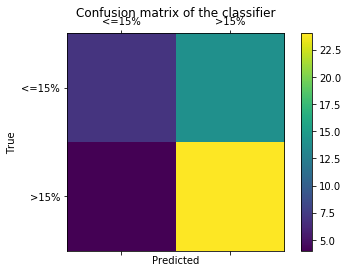

In [26]:
# add graphical details to the confusion matrix
labels = ['<=15%', '>15%']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Now that we have the confusion matrix, we can compute all of the metrics from the big chart above, such as precision and recall.

But why not just use scikit-learn?

In [27]:
from sklearn.metrics import recall_score, precision_score
print('recall: ', recall_score(y_test,y_pred))
print('precision: ', precision_score(y_test,y_pred))

recall:  0.8571428571428571
precision:  0.631578947368421


There are other metrics used to evaluate classification models. Scikit-learn has most of these built in, of course. 

Important note: the model can often be improved using feature selection and/or feature engineering and these processes will be covered in a later lesson.

# Take-aways

### 1. Scikit-learn made fitting a logistic regression model and evaluating the model easy through the .fit method, the .predict method and the built in evaluation metrics.






### 2. The same .fit, .predict methods and the same or similar evalution metrics are available in scikit-learn for a whole range of machine learning algorithms and they all use the same or very similar functionality. This is the essence of OOP!

# Next time: cross-validation and grid search cross validation

# Do It Yourself... 

## Repeat steps 3 through 6 with the famous Titanic survival data.

The dataset is in the folder "data" and is entitled "titanic.csv." Build a logistic regression model to predict the target variable "Survived." 

As a hint, any variables that cannot be converted to numeric variables should be discarded. As a further hint, one of the variables is numeric but does not have an ordering system, hence must be one-hot-encoded (even though it is already numeric!).

The initial steps are already done for you.


In [28]:
# load the data
# note to participants: change the path shown to your own path to load the data
new_df=pd.read_csv('/Users/michaeljoyce/Desktop/Intro_to_Scikit_Learn_Logistic_Regression/data/titanic.csv')

In [29]:
new_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB
